<a href="https://colab.research.google.com/github/9yubean2/DeepLearning/blob/main/LSTM_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/40
123/123 - 16s - loss: 2.6233 - accuracy: 0.3497 - val_loss: 2.3435 - val_accuracy: 0.3571 - 16s/epoch - 129ms/step
Epoch 2/40
123/123 - 14s - loss: 2.0745 - accuracy: 0.4770 - val_loss: 2.0456 - val_accuracy: 0.5058 - 14s/epoch - 110ms/step
Epoch 3/40
123/123 - 13s - loss: 1.9376 - accuracy: 0.4898 - val_loss: 1.8738 - val_accuracy: 0.4862 - 13s/epoch - 109ms/step
Epoch 4/40
123/123 - 13s - loss: 1.9963 - accuracy: 0.4836 - val_loss: 1.9356 - val_accuracy: 0.4969 - 13s/epoch - 109ms/step
Epoch 5/40
123/123 - 14s - loss: 1.8060 - accuracy: 0.5339 - val_loss: 1.8334 - val_accuracy: 0.5551 - 14s/epoch - 111ms/step
Epoch 6/40
123/123 - 14s - loss: 1.7271 - accuracy: 0.5482 - val_loss: 1.7364 - val_accuracy: 0.5408 - 14s/epoch - 110ms/step
Epoch 7/40
123/123 - 14s - loss: 1.6796 - accuracy: 0.5577 - val_loss: 1.7089 - val_accuracy: 0.5616 - 14s/epoch - 111ms/step
Epoch 8/40
123/123 - 14s - loss: 1.6615 - accuracy: 0.5643 - val_loss: 1.6858 - val_accuracy: 0.5607 - 14s/epoch - 111

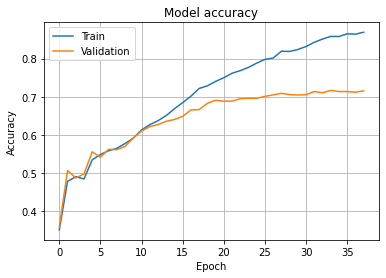

In [3]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

dic_size = 1000 #단어 빈도수
sample_size = 140  #샘플의 크기(뉴스 기사 길이)

#빈도수 1번째 ~ 1500번째 단어들만 사용(num_words=dic_size)
#전체 뉴스 기사 중 30%만 테스트용 뉴스 기사로 사용(test_split=0.3)
(x_train,y_train),(x_test,y_test)= reuters.load_data(num_words=dic_size, test_split=0.3)

embed_space_dim = 64 #64차원 임배딩 공간

#훈련용 데이터와 테스트용 데이터의 단어 수 다름
#모델 입력으로 길이를 동일하게 패딩
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen = sample_size)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen = sample_size)

#원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#조기 멈춤 적용(4세대 동안 성능향상 없으면 조기 종료)
early_stop = EarlyStopping(monitor = 'val_accuracy', verbose = 1, patience = 4, restore_best_weights = True)


#신경망 모델 설계와 학습(LSTM 층 포함)
embed = Sequential()
embed.add(Embedding(input_dim = dic_size, output_dim = embed_space_dim, input_length = sample_size))
embed.add(LSTM(units=64))
embed.add(Dense(46, activation = 'softmax')) #46개의 카테고리를 분류해야 함
#다중 클래스 분류: categorical_crossentropy
embed.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

#모델 학습
history = embed.fit(x_train, y_train, epochs = 40, batch_size = 64, validation_data = (x_test, y_test), verbose = 2, callbacks = [early_stop])

#모델 평가
result = embed.evaluate(x_test, y_test, verbose = 0)
print("\nAccuracy: ", result[1]*100)

#학습 곡선
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()